### **Latent Dirichlet Allocation**

In this workbook, we will employ LDA on text data to discover the topics discussed:
- xxx
- xxx
- xxx

In [17]:
# nltk.download('punkt')
# nltk.download('stopwords')

In [23]:
# pip install wordcloud

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
import textblob
import gensim
from PIL import Image

from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator

In [33]:
df_processed = pd.read_excel("amazon_review_processed.xlsx")
df_processed.head(5)

,Review Model,Retailer,Review date,Review name,Review rating,Review title,Review Content,Verified Purchase or not,People_find_helpful,vine or not,...,overall rating,content_word_count,title_word_count,content_char_count,title_char_count,content_avg_word,title_avg_word,content_stopwords,title_stopwords,Brand
0,Canon Pixma TS6420a,Amazon,2023-08-10,Ernest Birkholz,5,work,easy install work great,Verified Purchase,0.0,Not VINE VOICE,...,4.2,8,2,38,11,3.875000,5.000000,3,0,Canon
1,HP OfficeJet Pro 9015e,Amazon,2022-06-04,mattey,3,spunky mid size,slower speed im used old modelhpojpro 8600 new...,Verified Purchase,0.0,Not VINE VOICE,...,4.2,79,4,460,23,4.835443,5.000000,19,0,HP
2,Canon PIXMA MG3620,Amazon,2023-03-15,Maria D,4,𝙲𝚕𝚎𝚊𝚛 𝚙𝚛𝚒𝚗𝚝𝚜,𝙻𝚘𝚟𝚎 𝚒𝚝,Verified Purchase,0.0,Not VINE VOICE,...,4.2,2,2,7,12,3.000000,5.500000,0,0,Canon
3,Epson - ET-3830,Amazon,2022-11-17,Ryan H,5,shaq know he talking,yup slam dunk upgrade paid little front equiva...,Verified Purchase,12.0,Not VINE VOICE,...,4.2,84,6,469,34,4.595238,4.833333,31,2,Epson
4,HP ENVY 6055e,Amazon,2022-04-09,Sam,3,user friendly,would think something simple reconnecting wifi...,Verified Purchase,0.0,Not VINE VOICE,...,4.2,160,3,861,17,4.387500,5.000000,71,0,HP


#### <font color=#FFB703> **Tokenisation & Topic Modelling** </font>

<font color=#61BEB0>**Tokenisation:**</font>

In [34]:
# Tokenisation (Review Content)
df_processed['Tokenized Content'] = df_processed['Review Content'].apply(lambda x: word_tokenize(str(x)) if isinstance(x, str) else [])
df_processed[['Review Content', 'Tokenized Content']].head(5)

,Review Content,Tokenized Content
0,easy install work great,"[easy, install, work, great]"
1,slower speed im used old modelhpojpro 8600 new...,"[slower, speed, im, used, old, modelhpojpro, 8..."
2,𝙻𝚘𝚟𝚎 𝚒𝚝,"[𝙻𝚘𝚟𝚎, 𝚒𝚝]"
3,yup slam dunk upgrade paid little front equiva...,"[yup, slam, dunk, upgrade, paid, little, front..."
4,would think something simple reconnecting wifi...,"[would, think, something, simple, reconnecting..."


In [35]:
# Tokenisation (Review title)
df_processed['Tokenized title'] = df_processed['Review title'].apply(lambda x: word_tokenize(str(x)) if isinstance(x, str) else [])
df_processed[['Review title', 'Tokenized Content']].head(5)

,Review title,Tokenized Content
0,work,"[easy, install, work, great]"
1,spunky mid size,"[slower, speed, im, used, old, modelhpojpro, 8..."
2,𝙲𝚕𝚎𝚊𝚛 𝚙𝚛𝚒𝚗𝚝𝚜,"[𝙻𝚘𝚟𝚎, 𝚒𝚝]"
3,shaq know he talking,"[yup, slam, dunk, upgrade, paid, little, front..."
4,user friendly,"[would, think, something, simple, reconnecting..."


<font color=#61BEB0>**Topic Modelling (HP):**</font>

In [39]:
# filter for Brand = HP
brand_to_filter = 'HP'
filtered_df = df_processed[df_processed['Brand'] == brand_to_filter]

# Create a dictionary from the tokenized content
dictionary = corpora.Dictionary(filtered_df['Tokenized Content'])

# Create a corpus (bag of words) from the tokenized content
corpus = [dictionary.doc2bow(text) for text in filtered_df['Tokenized Content']]

# Build the LDA model
num_topics = 10  # You can adjust the number of topics as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)

# Print the topics and their top words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

# Assign the dominant topic to each document
filtered_df['Dominant Topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

(0, '0.014*"tray" + 0.010*"printer" + 0.008*"year" + 0.007*"time" + 0.007*"dont" + 0.007*"need" + 0.007*"like" + 0.007*"last" + 0.006*"also" + 0.006*"much"')
(1, '0.028*"subscription" + 0.015*"card" + 0.015*"buy" + 0.013*"page" + 0.013*"instant" + 0.013*"month" + 0.010*"monthly" + 0.010*"pay" + 0.009*"never" + 0.009*"cartridge"')
(2, '0.059*"sided" + 0.049*"double" + 0.006*"duplex" + 0.005*"primarily" + 0.005*"cartriges" + 0.005*"booklet" + 0.005*"manually" + 0.004*"flip" + 0.004*"promo" + 0.004*"shown"')
(3, '0.040*"cartridge" + 0.013*"new" + 0.012*"color" + 0.011*"would" + 0.010*"page" + 0.008*"bought" + 0.008*"black" + 0.008*"time" + 0.008*"buy" + 0.008*"printer"')
(4, '0.047*"month" + 0.041*"free" + 0.025*"6" + 0.023*"instant" + 0.012*"page" + 0.011*"subscription" + 0.011*"plan" + 0.007*"trial" + 0.007*"program" + 0.007*"dont"')
(5, '0.020*"app" + 0.013*"computer" + 0.013*"wifi" + 0.013*"smart" + 0.011*"scan" + 0.011*"setup" + 0.010*"work" + 0.010*"phone" + 0.009*"software" + 0.007

C:\Users\peace\AppData\Local\Temp\ipykernel_29176\1252720028.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Dominant Topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]


In [40]:
res1 = []

for i in range(num_topics):
    r1 = re.findall(r"[a-z]+",lda_model.print_topic(i,topn = 5))
    res1.extend(r1)
res1 = " ".join(res1)
res1

'tray printer year time dont subscription card buy page instant sided double duplex primarily cartriges cartridge new color would page month free instant page app computer wifi smart scan support tech hour customer call time work dont like need easy great quality good work time back day ever ive'

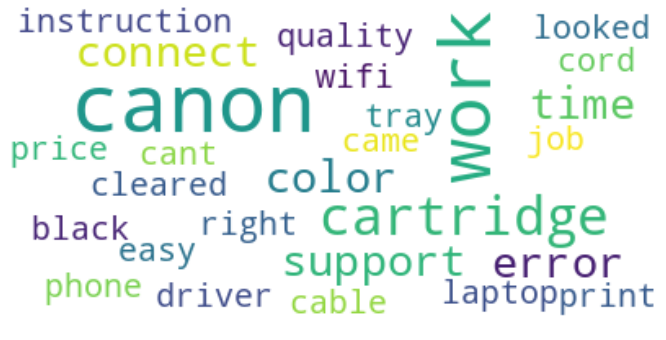

In [53]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(res1)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<font color=#61BEB0>**Topic Modelling (Epson):**</font>

In [46]:
# filter for Brand = Epson
brand_to_filter = 'Epson'
filtered_df = df_processed[df_processed['Brand'] == brand_to_filter]

# Create a dictionary from the tokenized content
dictionary = corpora.Dictionary(filtered_df['Tokenized Content'])

# Create a corpus (bag of words) from the tokenized content
corpus = [dictionary.doc2bow(text) for text in filtered_df['Tokenized Content']]

# Build the LDA model
num_topics = 10  # You can adjust the number of topics as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)

# Print the topics and their top words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

# Assign the dominant topic to each document
filtered_df['Dominant Topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

(0, '0.036*"cartridge" + 0.031*"epson" + 0.012*"buy" + 0.012*"update" + 0.011*"good" + 0.010*"firmware" + 0.010*"even" + 0.010*"black" + 0.009*"bought" + 0.008*"brand"')
(1, '0.012*"head" + 0.011*"black" + 0.007*"buy" + 0.006*"segment" + 0.006*"clean" + 0.006*"software" + 0.006*"box" + 0.005*"sponge" + 0.005*"dull" + 0.005*"work"')
(2, '0.008*"returned" + 0.007*"product" + 0.006*"alexa" + 0.005*"slow" + 0.005*"delivery" + 0.005*"box" + 0.005*"cord" + 0.005*"horrible" + 0.005*"wifi" + 0.005*"power"')
(3, '0.011*"like" + 0.010*"epson" + 0.010*"time" + 0.008*"easy" + 0.008*"screen" + 0.008*"tray" + 0.007*"work" + 0.007*"wifi" + 0.006*"copy" + 0.006*"would"')
(4, '0.023*"de" + 0.022*"que" + 0.017*"la" + 0.013*"feeder" + 0.012*"e" + 0.010*"en" + 0.009*"document" + 0.008*"un" + 0.008*"impresora" + 0.007*"muy"')
(5, '0.012*"epson" + 0.010*"page" + 0.008*"photo" + 0.008*"work" + 0.008*"time" + 0.007*"scan" + 0.007*"computer" + 0.006*"need" + 0.006*"document" + 0.006*"quality"')
(6, '0.035*"eps

C:\Users\peace\AppData\Local\Temp\ipykernel_29176\2451368214.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Dominant Topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]


In [47]:
res1 = []

for i in range(num_topics):
    r1 = re.findall(r"[a-z]+",lda_model.print_topic(i,topn = 5))
    res1.extend(r1)
res1 = " ".join(res1)
res1

'cartridge epson buy update good head black buy segment clean returned product alexa slow delivery like epson time easy screen de que la feeder e epson page photo work time epson support amazon would time great quality easy good color time money page cartridge jam program uninstall printed may cart'

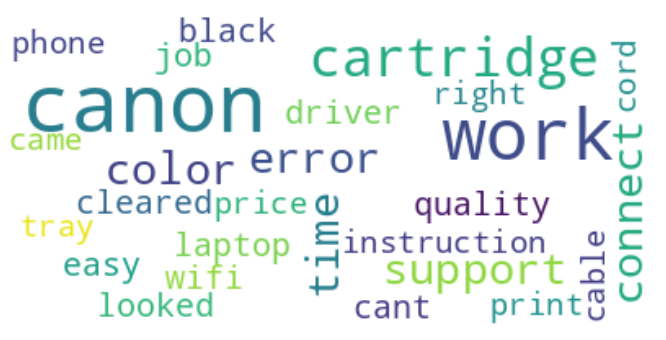

In [52]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(res1)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<font color=#61BEB0>**Topic Modelling (Cannon):**</font>

In [49]:
# filter for Brand = Canon
brand_to_filter = 'Canon'
filtered_df = df_processed[df_processed['Brand'] == brand_to_filter]

# Create a dictionary from the tokenized content
dictionary = corpora.Dictionary(filtered_df['Tokenized Content'])

# Create a corpus (bag of words) from the tokenized content
corpus = [dictionary.doc2bow(text) for text in filtered_df['Tokenized Content']]

# Build the LDA model
num_topics = 10  # You can adjust the number of topics as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)

# Print the topics and their top words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

# Assign the dominant topic to each document
filtered_df['Dominant Topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

(0, '0.027*"cartridge" + 0.017*"quality" + 0.014*"black" + 0.013*"easy" + 0.013*"color" + 0.011*"canon" + 0.010*"bought" + 0.009*"like" + 0.008*"model" + 0.008*"even"')
(1, '0.026*"canon" + 0.014*"job" + 0.012*"laptop" + 0.012*"error" + 0.012*"cleared" + 0.011*"jam" + 0.010*"working" + 0.010*"thing" + 0.010*"sheet" + 0.010*"2"')
(2, '0.011*"wifi" + 0.011*"time" + 0.010*"canon" + 0.010*"work" + 0.010*"connect" + 0.009*"quality" + 0.009*"page" + 0.009*"computer" + 0.008*"easy" + 0.007*"wireless"')
(3, '0.015*"canon" + 0.014*"time" + 0.010*"work" + 0.009*"would" + 0.009*"driver" + 0.008*"window" + 0.008*"even" + 0.007*"could" + 0.007*"buy" + 0.007*"ive"')
(4, '0.017*"canon" + 0.015*"looked" + 0.014*"support" + 0.013*"can" + 0.013*"not" + 0.012*"great" + 0.012*"old" + 0.011*"easy" + 0.010*"phone" + 0.010*"tech"')
(5, '0.022*"work" + 0.010*"canon" + 0.010*"cartridge" + 0.009*"cant" + 0.009*"instruction" + 0.008*"setting" + 0.008*"phone" + 0.008*"could" + 0.007*"want" + 0.007*"find"')
(6, '0

C:\Users\peace\AppData\Local\Temp\ipykernel_29176\1950920593.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Dominant Topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]


In [50]:
res1 = []

for i in range(num_topics):
    r1 = re.findall(r"[a-z]+",lda_model.print_topic(i,topn = 5))
    res1.extend(r1)
res1 = " ".join(res1)
res1

'cartridge quality black easy color canon job laptop error cleared wifi time canon work connect canon time work would driver canon looked support can not work canon cartridge cant instruction canon connect support work phone cartridge canon tray also color cable work came cord right canon work print error price'

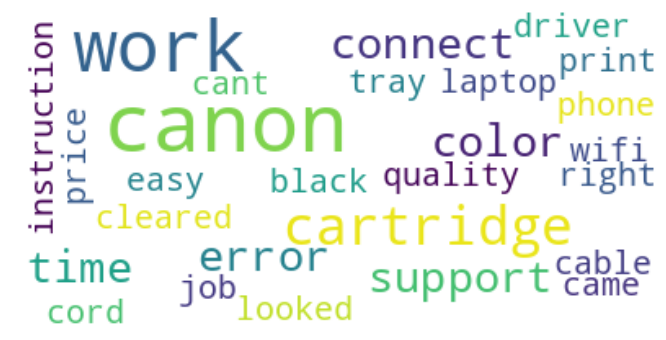

In [51]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(res1)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()